# Importing Libraries

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import cv2
from keras.preprocessing.image import img_to_array

# Importing the trained Model

In [5]:
from keras.models import load_model
model = load_model("pneumonia_detection.h5")

# Loading the Test data 

In [7]:
eval_datagen = ImageDataGenerator(rescale = 1/255)

test_generator = eval_datagen.flow_from_directory(
   r"C:\Users\ACER\Desktop\Pneumonia Detect\chest_xray\test", # file path
    target_size = (300, 300),
    batch_size = 128, 
    class_mode = 'binary'
)

eval_result = model.evaluate(test_generator, steps=624) # evaluation on the test data 
print('loss :', eval_result[0])    #loss of model 
print('accuracy :', eval_result[1]) #accuracy for the detection

Found 624 images belonging to 2 classes.


C:\Users\ACER\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


624/624 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9247 - loss: 0.2287
loss : 0.2285676896572113
accuracy : 0.9246794581413269


C:\Users\ACER\anacond3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


# Prediction on an Image

In [9]:
img= cv2.imread(r"C:\Users\ACER\Desktop\Pneumonia Detect\chest_xray\test\NORMAL\NORMAL2-IM-0350-0001.jpeg") # import File path
tempimg = img
img = cv2.resize(img,(300,300)) # image resizing
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[0.05252323]], dtype=float32)

# Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Normal


Text(0.5, 1.0, 'Prediction: Normal')

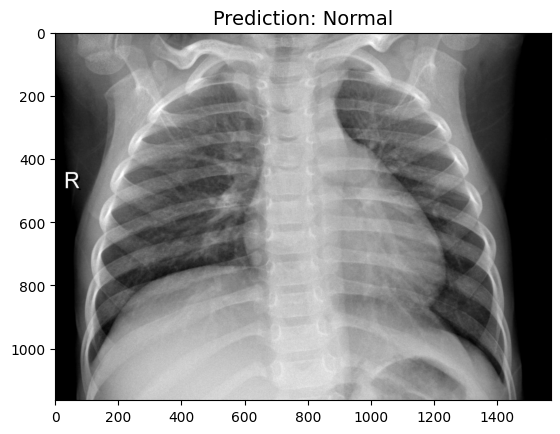

In [11]:
prediction = model.predict(img) >= 0.5  
if prediction>=0.5:    # if prediction is more than 50%
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)

In [12]:
img= cv2.imread(r"C:\Users\ACER\Desktop\Pneumonia Detect\chest_xray\test\PNEUMONIA\person31_virus_70.jpeg")
tempimg = img
img = cv2.resize(img,(300,300))
img = img/255.0
img = img.reshape(1,300,300,3)
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[0.9994927]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Pneumonia


Text(0.5, 1.0, 'Prediction: Pneumonia')

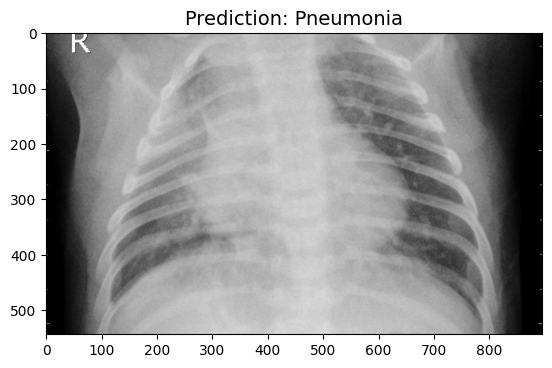

In [13]:
prediction = model.predict(img) >= 0.5
if prediction>=0.5:
  prediction = "Pneumonia"
else:
  prediction = "Normal"
print("Prediction: "+prediction)
plt.imshow(tempimg)
plt.title("Prediction: "+prediction, fontsize=14)
     